Problem Statement:
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

Data Description -
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of
0(low cost),
1(medium cost),
2(high cost) and
3(very high cost).

Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [1]:
#Importing Libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Mobile Price Range Prediction -Rohit Madame/data_mobile_price_range.csv'


In [4]:
df=pd.read_csv(file_path)

In [5]:
#Looking for first 5 rows

pd.set_option('display.max_columns',None)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#Reading last 5 rows

df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [7]:
#Getting information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
#Checking for null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
#checking for shape

df.shape

(2000, 21)

In [10]:
#Checking for duplicate values
df.duplicated().sum()

0

In [11]:
#Checking for numeric data and its statics

pd.set_option('display.max_columns',None)
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As we can see that screen width and pixel height has minimum value 0. Which is not possible.so we have to handle it

In [12]:
#how many values have 0 in screen width column
df[df['sc_w']==0].shape[0]

180

In [13]:
#how many values have 0 in pixel width column

df[df['px_height']==0].shape[0]

2

In [14]:
#Dropping the rows where pixel height is zero
df=df[df['px_height']!=0]

In [15]:
#Checking for shape
df.shape

(1998, 21)

In [16]:
#We are replacing 0 value with mean
df['sc_w']=df['sc_w'].replace(0,df['sc_w'].mean())

In [17]:
#checking the shape of screen width
df[df['sc_w']==0].shape[0]

0

**EDA**




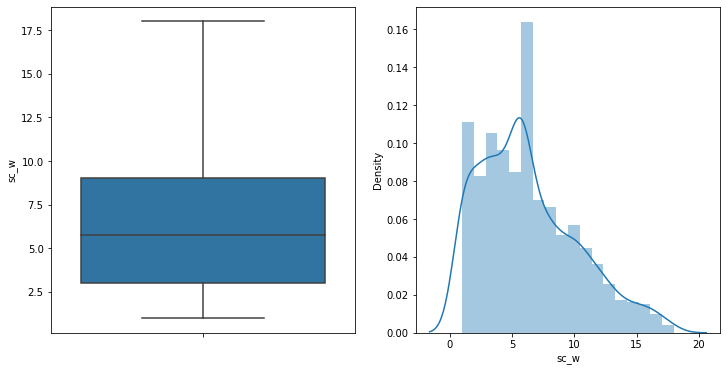

In [18]:
#as 0 in the scree width is replaced by mean
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['sc_w'])
plt.subplot(1,2,2)
sns.distplot(df['sc_w'])

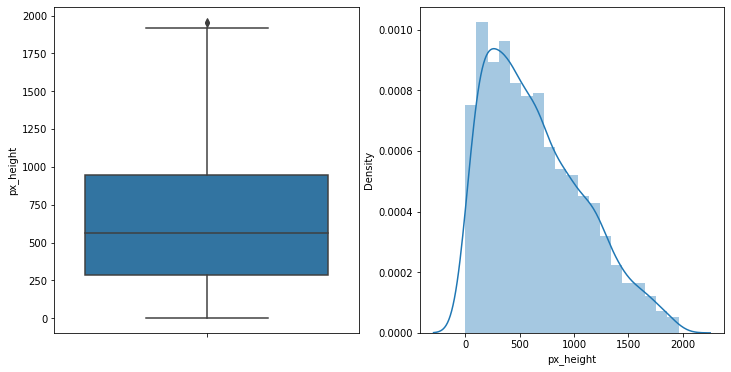

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['px_height'])
plt.subplot(1,2,2)
sns.distplot(df['px_height'])

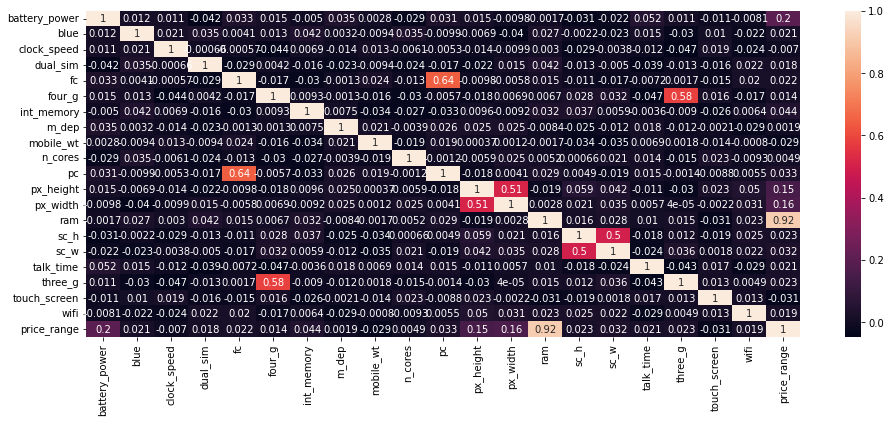

In [20]:
#Getting information about correlation with the help of heatmap
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

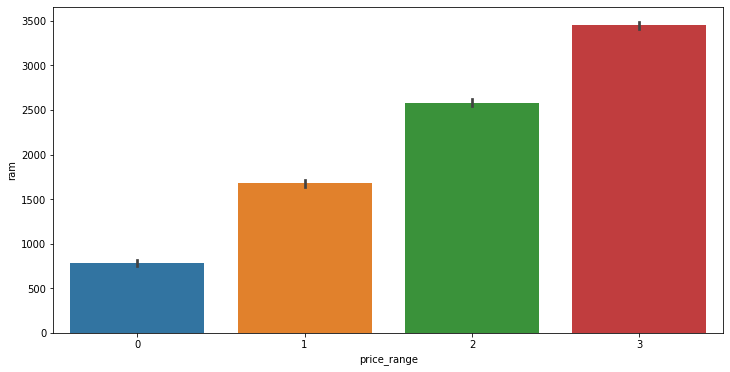

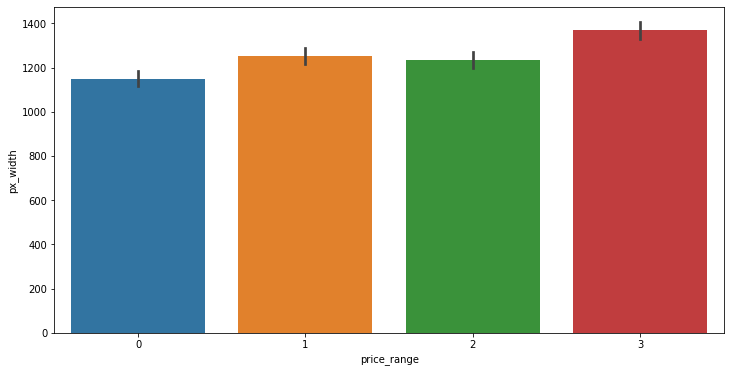

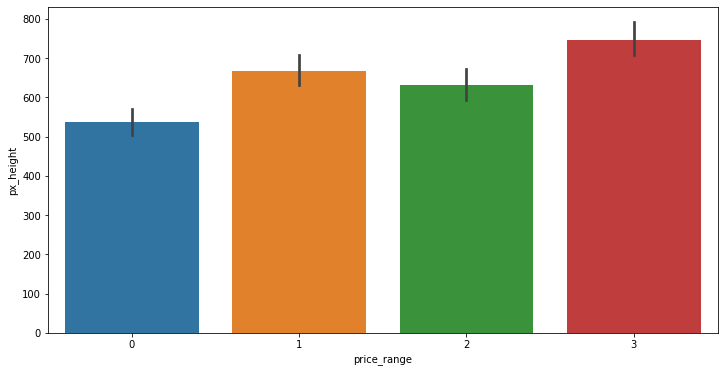

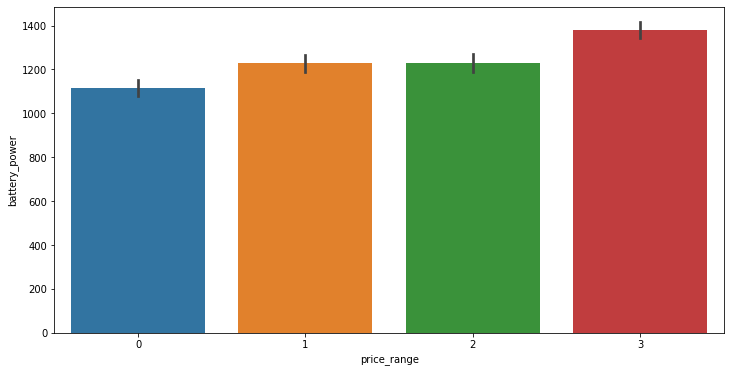

In [21]:
#Plotting graph for price range with most correlated variable
correlated=['ram','px_width','px_height','battery_power']

for i in correlated:
    plt.figure(figsize=(12,6))
    sns.barplot(x=df['price_range'],y=df[i])

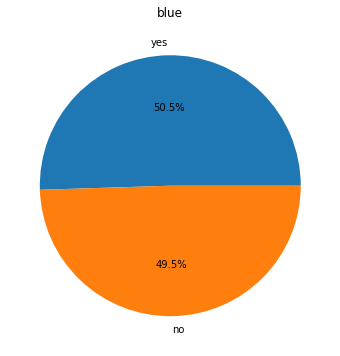

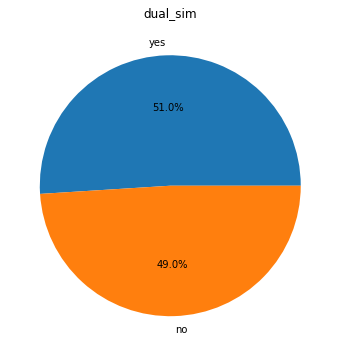

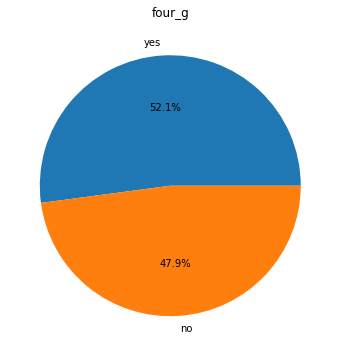

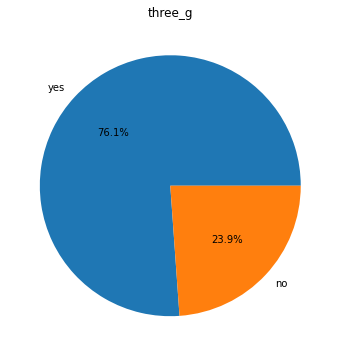

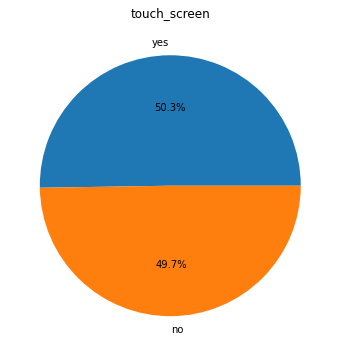

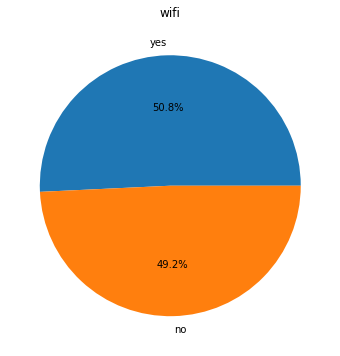

In [22]:
#Plotting pie chart for the binary variables

var=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

for i in var:
    plt.figure(figsize=(12,6))
    plt.pie(df[i].value_counts(),autopct='%1.1f%%',labels=['yes','no'])
    plt.title(i)

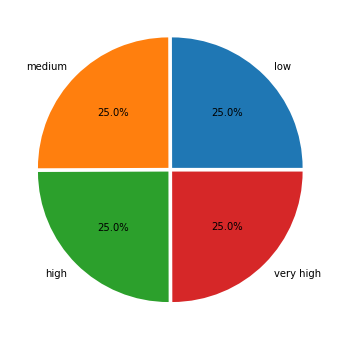

In [23]:
#Plotting pie chart for price range

plt.figure(figsize=(10,6))
plt.pie(x=df['price_range'].value_counts(),explode=[0.02,0.02,0.02,0.02],labels=['low','medium','high','very high'],autopct='%1.1f%%')

plt.show()

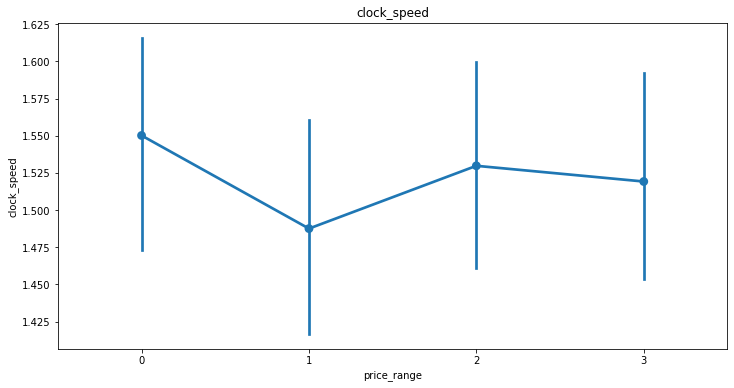

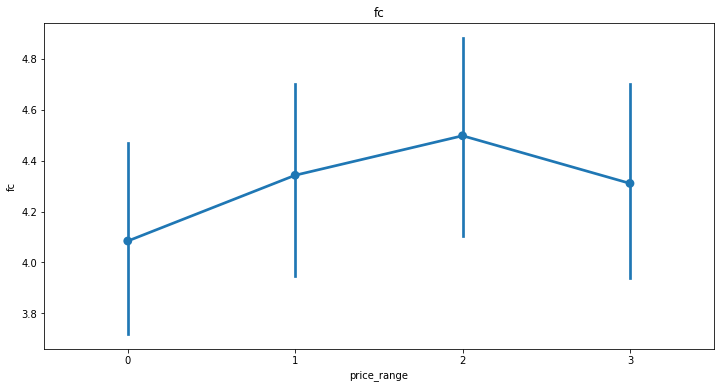

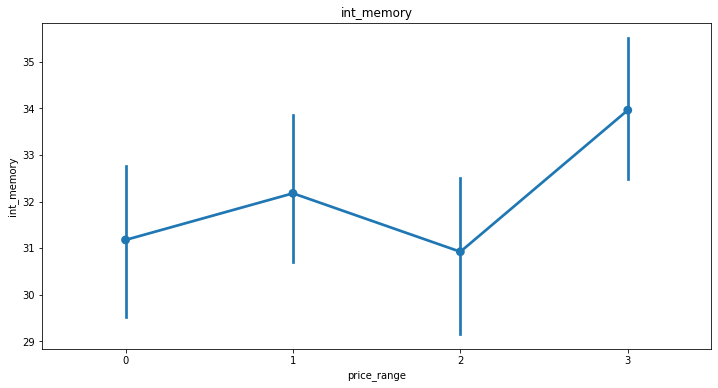

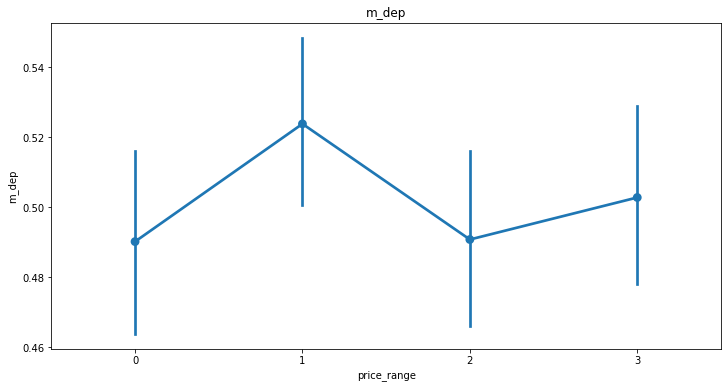

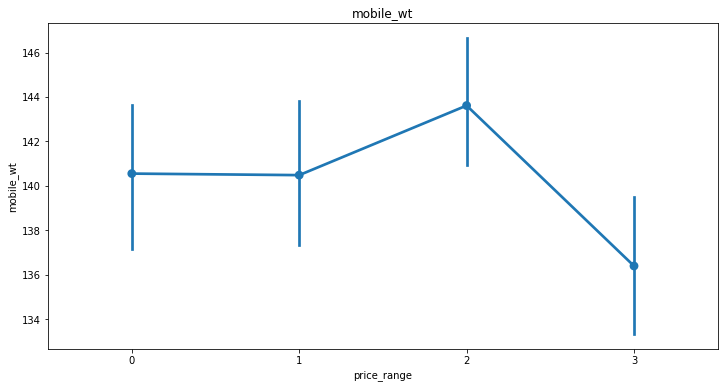

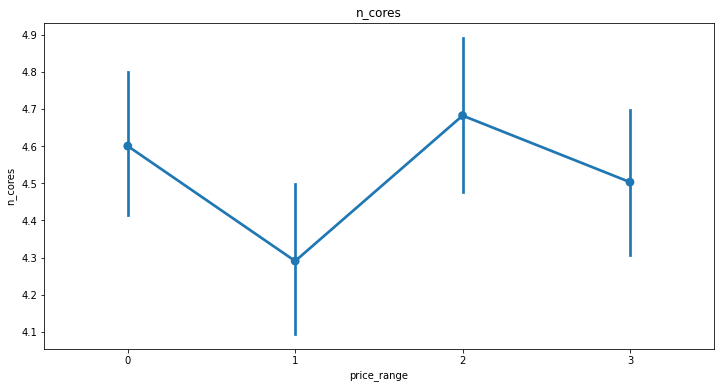

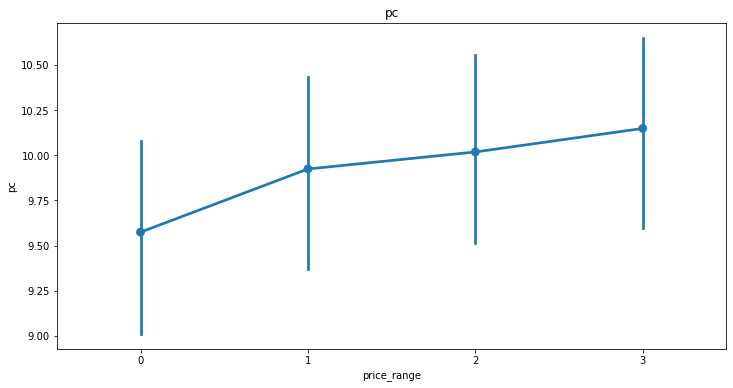

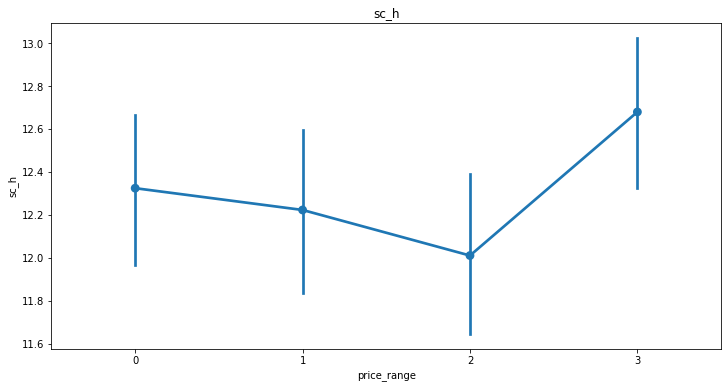

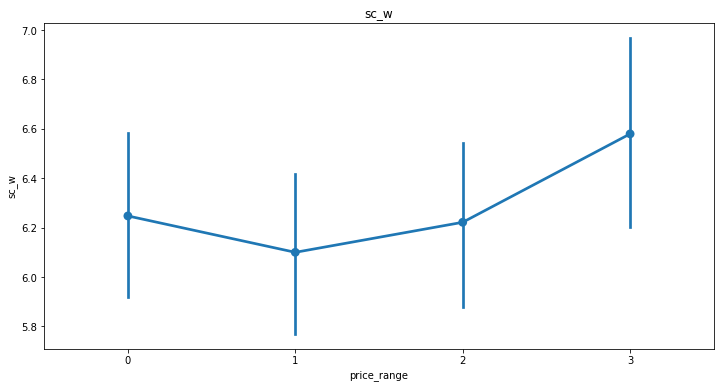

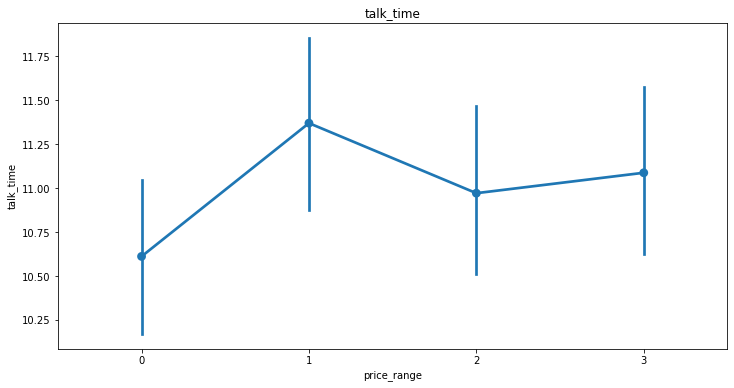

In [24]:
#Plotting point plot for independant variable to dependant variable

other=['clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','sc_h','sc_w','talk_time']


for i in other:
    plt.figure(figsize=(12,6))
    sns.pointplot(x=df['price_range'],y=df[i])
    plt.title(i)


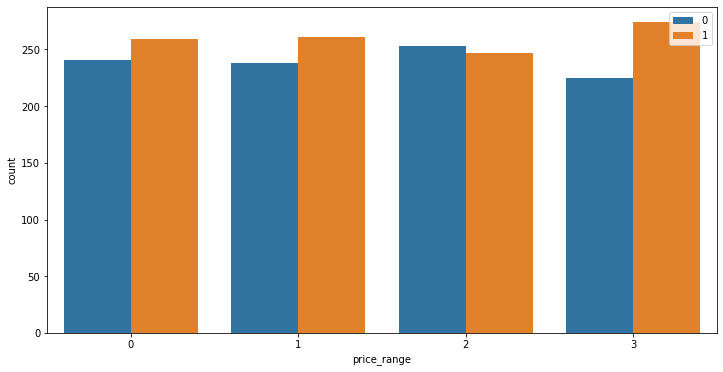

In [25]:
#plotting for four g with the price range
plt.figure(figsize=(12,6))
sns.countplot(x=df['price_range'],hue=df['four_g'])
plt.legend(loc='upper right')

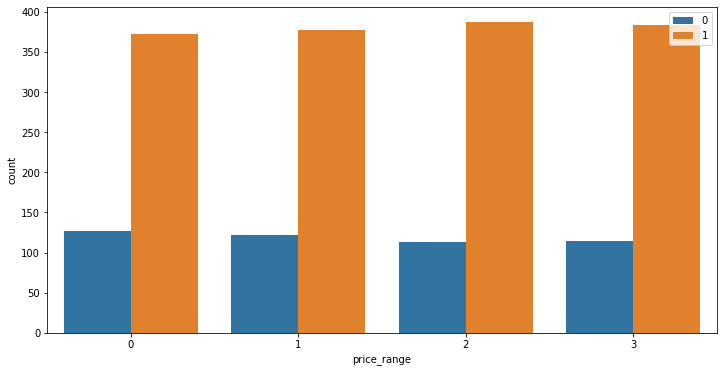

In [26]:
#plotting for four g with the price range
plt.figure(figsize=(12,6))
sns.countplot(x=df['price_range'],hue=df['three_g'])
plt.legend(loc='upper right')

In [27]:
var=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

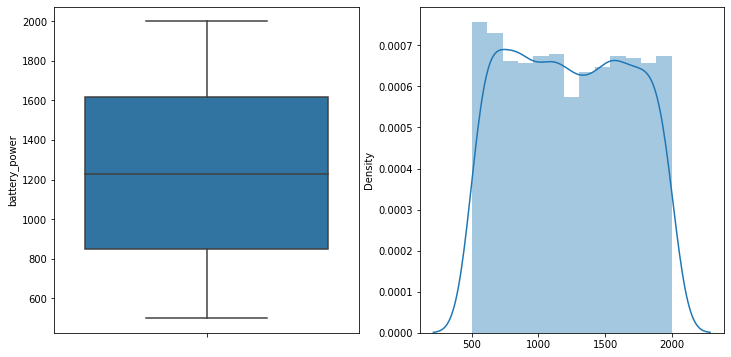

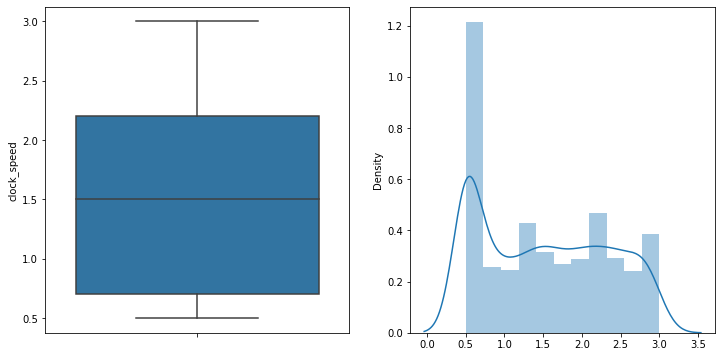

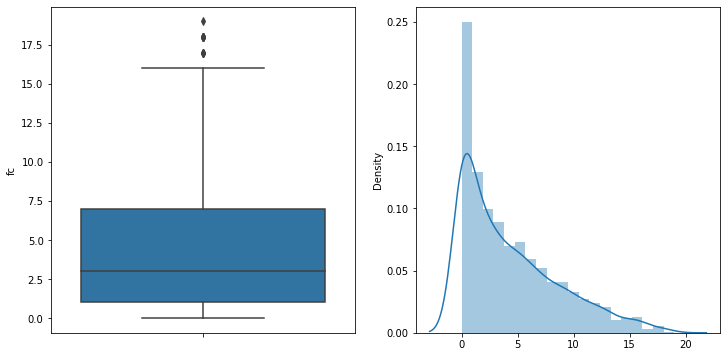

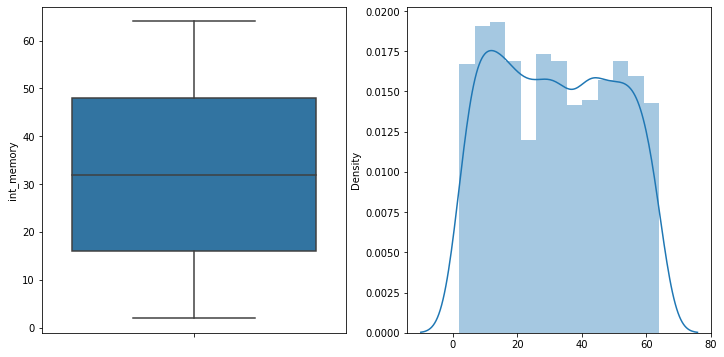

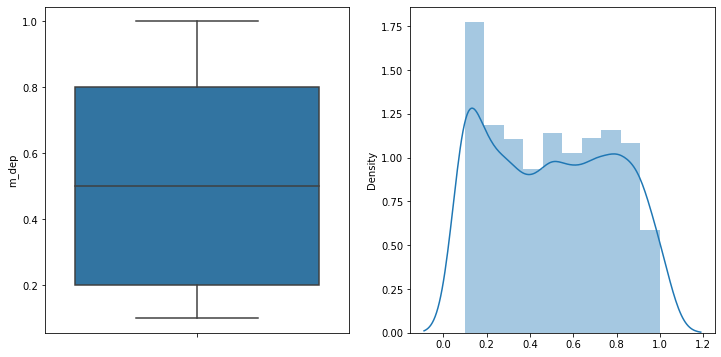

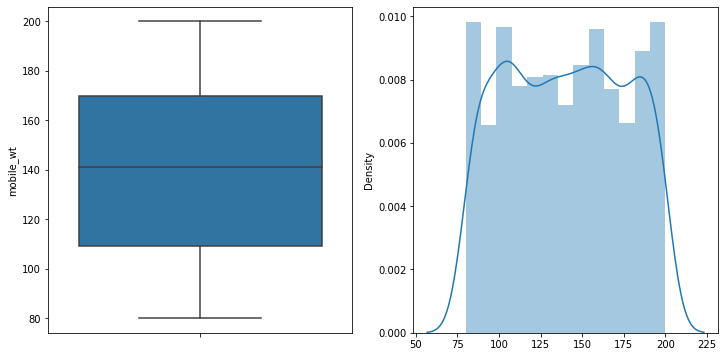

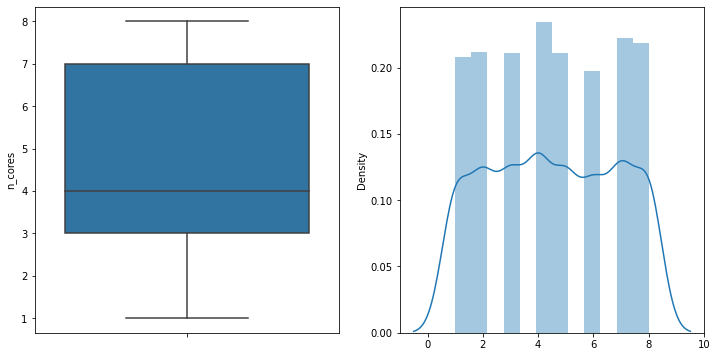

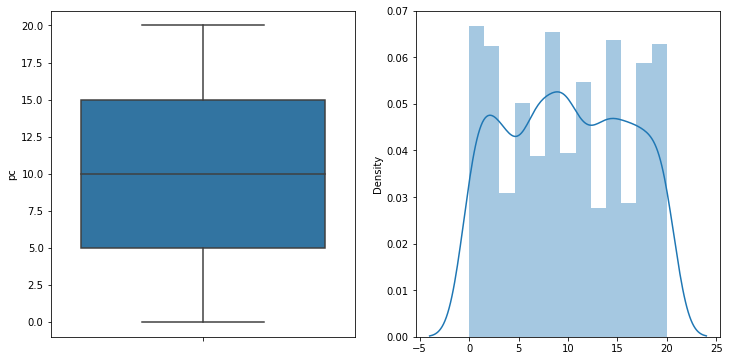

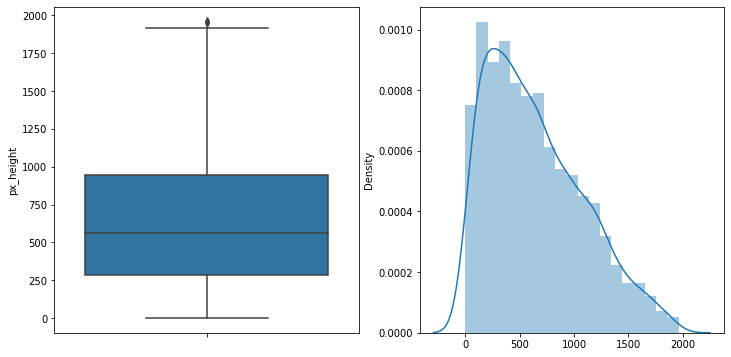

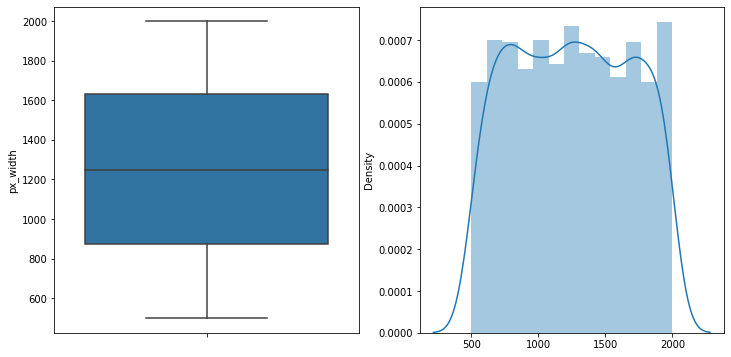

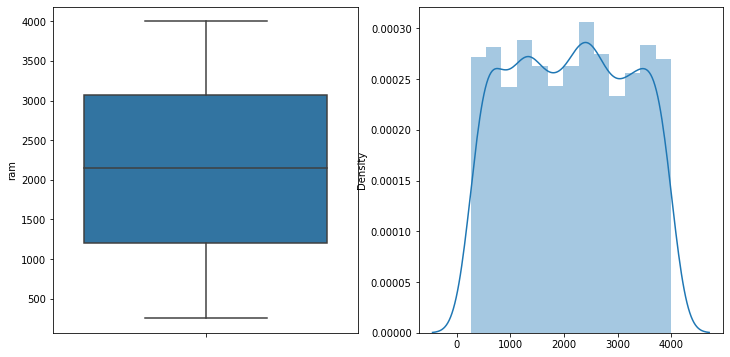

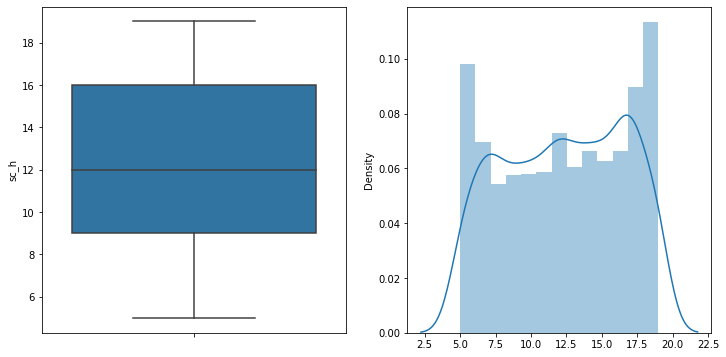

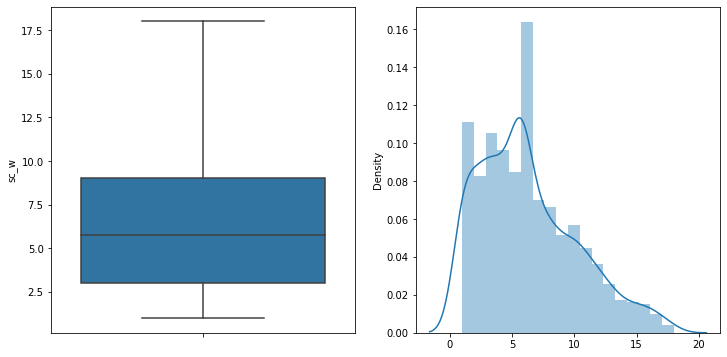

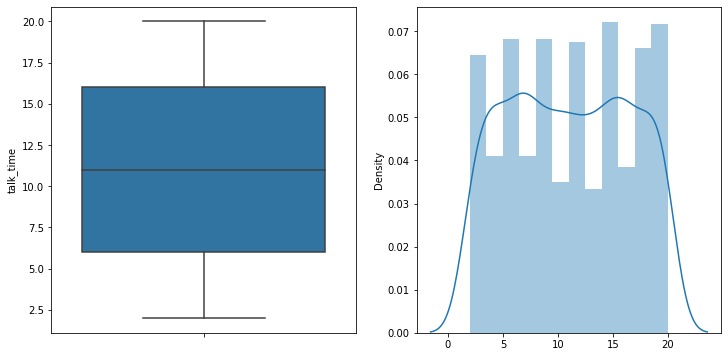

In [28]:
#Checking for outliers of independant variable
for i in var:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(y=df[i])
    
    
    plt.subplot(1,2,2)
    sns.distplot(x=df[i])

fc and px_height contain some outliers

In [29]:
# print(df['fc'].mean())
# print(df['fc'].std())
# print(df['fc'].min())
# print(df['fc'].max())

In [30]:
#Calculating quantile of 25%
fc_qua25=df['fc'].quantile(0.25)

In [31]:
#Calculating quantile of 75%

fc_qua75=df['fc'].quantile(0.75)

In [32]:
#calculating Interquantilerange
iqr=fc_qua75-fc_qua25

In [33]:
#Upper limit 
upper_limit=fc_qua75+1.5*iqr

In [34]:
#Dropping values above the upper limit
df=df[df['fc']<upper_limit]

In [35]:
df.shape

(1956, 21)

In [36]:
#Outliers in the pixel height

px_quan25=df['px_height'].quantile(0.25)
px_quan75=df['px_height'].quantile(0.75)

In [37]:
#calculating Interquantilerange

iqr2=px_quan75-px_quan25

In [38]:
#Dropping values above the upper limit

upper_limit2=px_quan75+1.5*iqr2

In [39]:
#Dropping values above the upper limit

df=df[df['px_height']<upper_limit2]

In [40]:
df.shape

(1954, 21)

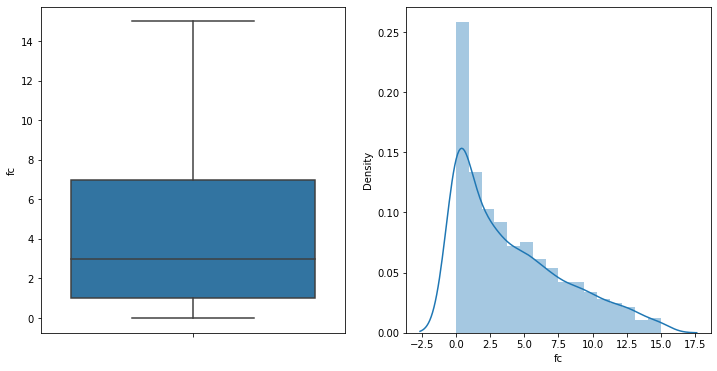

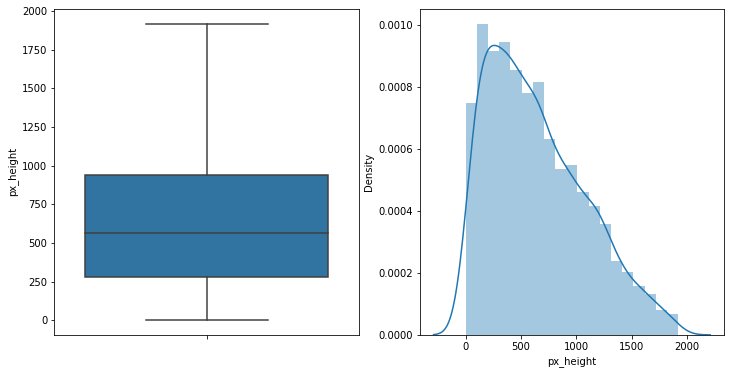

In [41]:
#Checking for outliers with the help of box plot

out=['fc','px_height']
for i in out:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(y=df[i])
    
    plt.subplot(1,2,2)
    sns.distplot(df[i])

we have succefully removed outliers

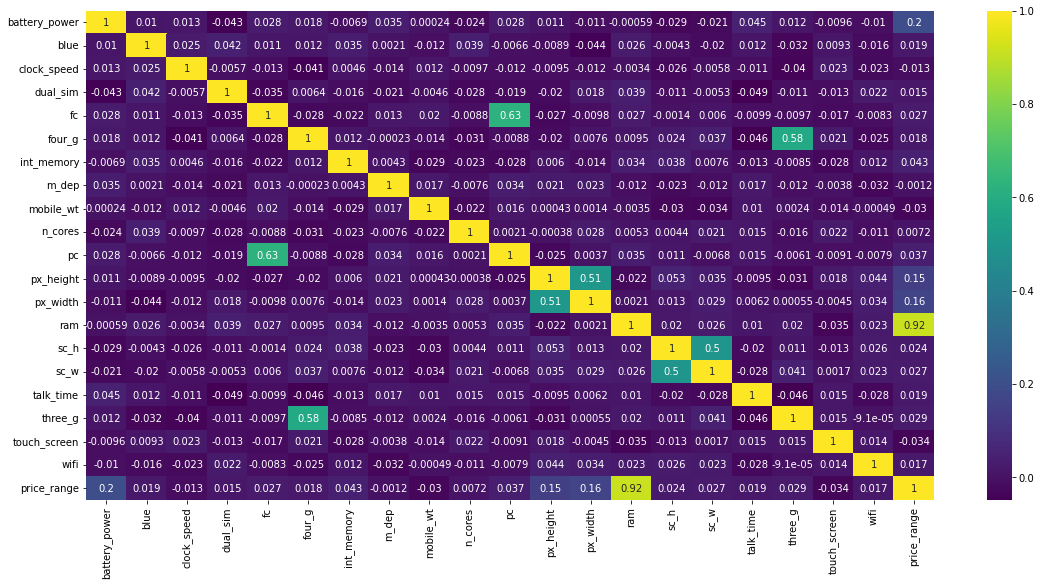

In [42]:
#Plotting heatmap to see the correlation
plt.figure(figsize=(19,9))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [43]:
# print(df['fc'].mean())
# print(df['fc'].std())
# print(df['fc'].min())
# print(df['fc'].max())

In [44]:
#Copying the data into data variable
data=df.copy()

In [45]:
#Spliting data into x and y
X=data.drop('price_range',axis=1)
y=data['price_range']

In [46]:
#Importing train test split
from sklearn.model_selection import train_test_split

In [47]:
#Spliting data into training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Applying gradient boosting classifier

In [48]:
#Importing gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

In [49]:
#fiting the gradient boosting classifier
gbc=GradientBoostingClassifier(random_state=142,)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=142)

In [50]:
#Predicting for train and test value

y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [51]:
#Importing libraries for accuracy score ,confusion matrix,classification report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
#Checking accuracy for train data
print(accuracy_score(y_train,y_train_pred))


1.0


In [53]:
#cheking accuracy for test data
print(accuracy_score(y_test,y_pred))

0.8943781942078365


In [54]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[142,   5,   0,   0],
       [ 18, 116,  10,   0],
       [  0,   7, 134,   9],
       [  0,   0,  13, 133]])

In [56]:
#Printing classification report on train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00       341
           2       1.00      1.00      1.00       339
           3       1.00      1.00      1.00       343

    accuracy                           1.00      1367
   macro avg       1.00      1.00      1.00      1367
weighted avg       1.00      1.00      1.00      1367



In [57]:
#Printing classification report on test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       147
           1       0.91      0.81      0.85       144
           2       0.85      0.89      0.87       150
           3       0.94      0.91      0.92       146

    accuracy                           0.89       587
   macro avg       0.90      0.89      0.89       587
weighted avg       0.90      0.89      0.89       587



Hyperparameter Tunning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param={
    'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
}

In [60]:
hyper_gbc=GridSearchCV(gbc,param_grid=param,cv=3,verbose=3,n_jobs=1)

In [61]:
#Fitting with the 
hyper_gbc.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END learning_rate=0.005, min_samples_split=10;, score=0.798 total time=   1.7s
[CV 2/3] END learning_rate=0.005, min_samples_split=10;, score=0.794 total time=   1.5s
[CV 3/3] END learning_rate=0.005, min_samples_split=10;, score=0.791 total time=   2.1s
[CV 1/3] END learning_rate=0.005, min_samples_split=11;, score=0.798 total time=   1.9s
[CV 2/3] END learning_rate=0.005, min_samples_split=11;, score=0.794 total time=   1.5s
[CV 3/3] END learning_rate=0.005, min_samples_split=11;, score=0.791 total time=   1.5s
[CV 1/3] END learning_rate=0.005, min_samples_split=12;, score=0.798 total time=   1.5s
[CV 2/3] END learning_rate=0.005, min_samples_split=12;, score=0.794 total time=   1.5s
[CV 3/3] END learning_rate=0.005, min_samples_split=12;, score=0.791 total time=   1.5s
[CV 1/3] END learning_rate=0.005, min_samples_split=13;, score=0.798 total time=   1.5s
[CV 2/3] END learning_rate=0.005, min_samples_split=13;, s

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=142),
             n_jobs=1,
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             verbose=3)

In [62]:
hyper_gbc.best_params_

{'learning_rate': 1, 'min_samples_split': 16}

In [63]:
#fitting with best parameter
gbc_=GradientBoostingClassifier(learning_rate=1,min_samples_split=16)

In [64]:
gbc_.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=16)

In [65]:
# predicting the y values of train and test set.
y_train_pred_gbc=gbc_.predict(X_train)  
y_pred_gbc=gbc_.predict(X_test)

In [66]:
#Checking for accuracy score of train set
accuracy_score(y_train,y_train_pred)

1.0

In [67]:
#Checking for accuracy score of test set
accuracy_score(y_test,y_pred_gbc)

0.8909710391822828

In [68]:
#Checking score for features
feature_gbc=pd.DataFrame({'Features':X.columns,'score':gbc_.feature_importances_}).sort_values(by='score',ascending=False)
feature_gbc

,Features,score
13,ram,0.833605
0,battery_power,0.102250
11,px_height,0.039011
12,px_width,0.017115
6,int_memory,0.002900
8,mobile_wt,0.001679
15,sc_w,0.000631
10,pc,0.000452
9,n_cores,0.000437
7,m_dep,0.000368


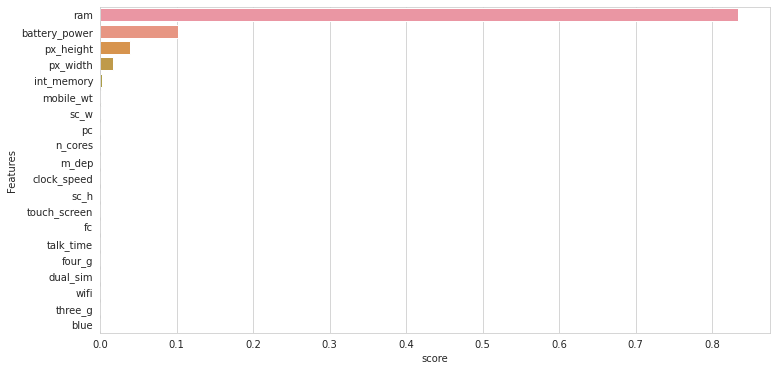

In [69]:
#plotting features 
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(x=feature_gbc['score'],y=feature_gbc['Features'])

**Random Forest Classifier**

In [70]:
#Importing library
from sklearn.ensemble import RandomForestClassifier

In [71]:
#Fitting instances
rfc=RandomForestClassifier()

In [72]:
#Fitting train and test data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
#Predicting for train data
rfc_train_pred=rfc.predict(X_train)

In [74]:
#Predicting for test data
rfc_test_pred=rfc.predict(X_test)

In [75]:
#Accuracy for train data
accuracy_score(y_train,rfc_train_pred)

1.0

In [76]:
#Accuracy for test data
accuracy_score(y_test,rfc_test_pred)

0.8637137989778535

Hyper parameter tunning

In [77]:
grid_values={
    'n_estimators':[300,400,500,600,700],
    'criterion':["gini", "entropy"],
    'max_depth':[10,20,40],
    'min_samples_split':[2,6,10],
    'max_features':["auto", "sqrt", "log2"]
}

In [78]:
#Fitting to train and test
rfc_tune=GridSearchCV(rfc,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.857 total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.862 total time=   0.9s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.853 total time=   0.9s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=400;, score=0.862 total time=   1.2s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=400;, score=0.862 total time=   1.2s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=400;, score=0.848 total time=   1.2s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.853 total time=   1.4s
[CV 2/

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 600, 700]},
             scoring='accuracy', verbose=3)

In [79]:
#Best Estimator
rfc_tune.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=40, max_features='sqrt',
                       min_samples_split=6, n_estimators=400)

In [80]:
#Best parameter
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 400}

In [81]:
#Fitting best parameters to random forest
rfc_hype=RandomForestClassifier(criterion='entropy',max_depth=20,max_features='sqrt',min_samples_split=6,n_estimators=400)

In [82]:
#fitting 
rfc_hype.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_split=6, n_estimators=400)

In [83]:
#Predicting for train and test
rfc_hpye_train=rfc_hype.predict(X_train)
rfc_hype_test=rfc_hype.predict(X_test)

In [84]:
#Accuracy score for train
accuracy_score(y_train,rfc_hpye_train)

1.0

In [85]:
#Accuracy score for test
accuracy_score(y_test,rfc_hype_test)

0.8875638841567292

In [86]:
#Feature score 
feature_rfc=pd.DataFrame({'features':X.columns,'score':rfc_hype.feature_importances_}).sort_values(by='score',ascending=False)

In [87]:
feature_rfc

,features,score
13,ram,0.547146
0,battery_power,0.072255
12,px_width,0.057373
11,px_height,0.054341
6,int_memory,0.032155
8,mobile_wt,0.030431
10,pc,0.025244
16,talk_time,0.025060
15,sc_w,0.023954
14,sc_h,0.022527


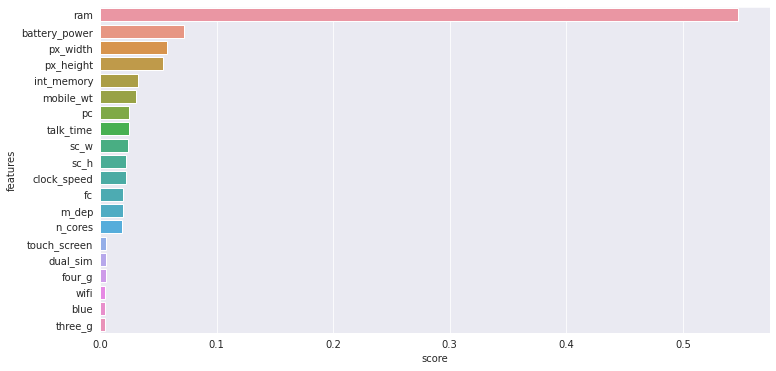

In [88]:
#plotting features 
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(y=feature_rfc['features'],x=feature_rfc['score'])

KNearestNeighbour

In [89]:
#Importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [90]:
#Creating instance
knn=KNeighborsClassifier()

In [91]:
#Fitting it
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
#Predicting for train and test 
knn_train_pred=knn.predict(X_train)
knn_pred_test=knn.predict(X_test)

In [93]:
#Accuracy score for train
accuracy_score(y_train,knn_train_pred)

0.9509875640087784

In [94]:
#accuracy score for test
accuracy_score(y_test,knn_pred_test)

0.9182282793867121

In [95]:
#Confusion matrix 
confusion_matrix(y_test,knn_pred_test)

array([[142,   5,   0,   0],
       [ 13, 122,   9,   0],
       [  0,   5, 136,   9],
       [  0,   0,   7, 139]])

In [96]:
print(classification_report(y_test,knn_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.92      0.85      0.88       144
           2       0.89      0.91      0.90       150
           3       0.94      0.95      0.95       146

    accuracy                           0.92       587
   macro avg       0.92      0.92      0.92       587
weighted avg       0.92      0.92      0.92       587



In [97]:
print(classification_report(y_train,knn_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       344
           1       0.94      0.94      0.94       341
           2       0.92      0.93      0.93       339
           3       0.98      0.95      0.96       343

    accuracy                           0.95      1367
   macro avg       0.95      0.95      0.95      1367
weighted avg       0.95      0.95      0.95      1367



**Hyperparameter Tunning**

In [98]:
knn_parameter={
    'n_neighbors':list(range(1,31))

}

In [99]:
knn_hyperparameter=GridSearchCV(knn,param_grid=knn_parameter,cv=3,verbose=3,scoring='accuracy')

In [100]:
knn_hyperparameter.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.917 total time=   0.0s
[CV 2/3] END .....................n_neighbors=1;, score=0.890 total time=   0.0s
[CV 3/3] END .....................n_neighbors=1;, score=0.870 total time=   0.0s
[CV 1/3] END .....................n_neighbors=2;, score=0.897 total time=   0.0s
[CV 2/3] END .....................n_neighbors=2;, score=0.879 total time=   0.0s
[CV 3/3] END .....................n_neighbors=2;, score=0.866 total time=   0.1s
[CV 1/3] END .....................n_neighbors=3;, score=0.923 total time=   0.0s
[CV 2/3] END .....................n_neighbors=3;, score=0.923 total time=   0.0s
[CV 3/3] END .....................n_neighbors=3;, score=0.888 total time=   0.0s
[CV 1/3] END .....................n_neighbors=4;, score=0.930 total time=   0.0s
[CV 2/3] END .....................n_neighbors=4;, score=0.901 total time=   0.0s
[CV 3/3] END .....................n_neighbors=4;

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [101]:
knn_hyperparameter.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [102]:
knn_hyperparameter.best_params_

{'n_neighbors': 25}

In [103]:
knn_hyperparameter.best_score_

0.923174924490714

In [104]:
knn_train_pred=knn_hyperparameter.predict(X_train)
knn_test_pred=knn_hyperparameter.predict(X_test)

In [105]:
accuracy_score(y_train,knn_train_pred)

0.9451353328456474

In [106]:
accuracy_score(y_test,knn_test_pred)

0.909710391822828